# 初始化

In [5]:
import sys
import time
import logging
import datetime
from pathlib import Path
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# from sklearn.cluster import DBSCAN
from tqdm import tqdm_notebook as tqdm

logging.basicConfig(level=logging.INFO, format='%(asctime)s: %(name)s: %(levelname)s: %(message)s',
                    datefmt='%y-%m-%d %H:%M:%S', stream=sys.stdout)
logger = logging.getLogger()

## Load

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly_express as px
from pathlib import Path

from plotly.offline import iplot

In [83]:
fn = Path('/home/renjiangzhe/lake_mark_info.txt')

idxs = []
marks = []
with fn.open('r') as fd:
    with tqdm(total=804, desc='Process:') as pbar:
        for i in fd:
            pbar.update(1)
            idx, mark = i.split()
            idxs.append(idx)
            marks.append(mark)
#             df[idx] = mark

df = pd.DataFrame(marks, index=idxs, columns=['water_mark'])

In [84]:
df.head()

,water_mark
1,6910
2,6881
3,6956
4,6942
5,6960


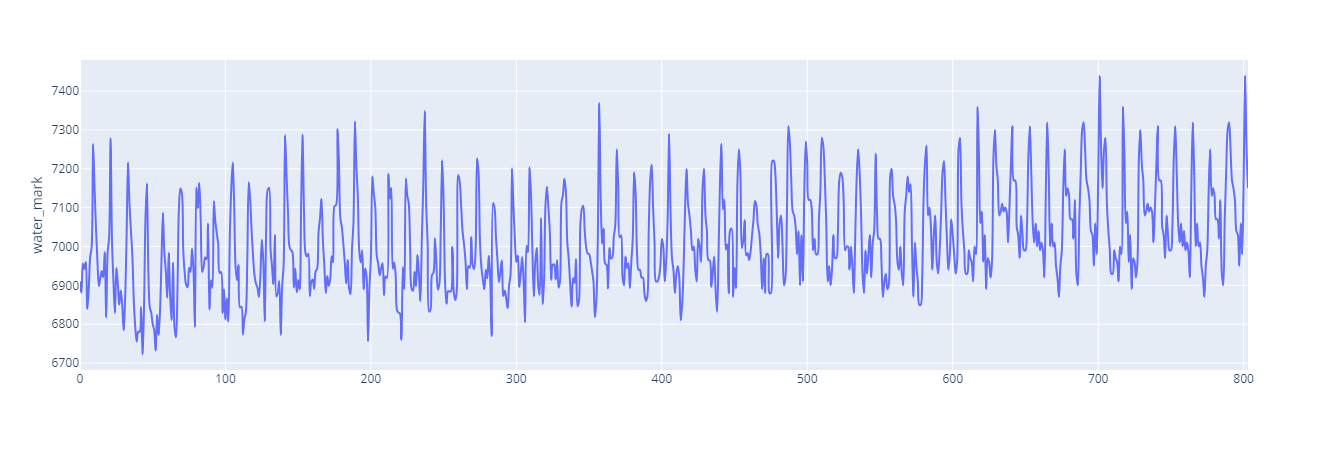

In [38]:
px.line(df, y='water_mark', height=650, line_shape='spline')  #, color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)

In [40]:
from fbprophet import Prophet

In [85]:
df.index = pd.period_range('1951-01', '2017-12', freq='M').to_timestamp()

In [87]:
df.reset_index(inplace=True)

In [89]:
df.columns = ['ds', 'y']

In [90]:
df.head()

,ds,y
0,1951-01-01,6910
1,1951-02-01,6881
2,1951-03-01,6956
3,1951-04-01,6942
4,1951-05-01,6960


In [ ]:
df = pd.read_csv('../examples/example_wp_log_peyton_manning.csv')
df.head()

In [117]:
%%time
# 定义模型
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=100)  # mcmc_samples=300, 

# 训练模型
m.fit(df)

19-06-06 11:41:32: fbprophet: INFO: Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
19-06-06 11:41:32: fbprophet: INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
19-06-06 11:42:00: pystan: WARNING: 50 of 200 iterations saturated the maximum tree depth of 10 (25 %)
19-06-06 11:42:00: pystan: WARNING: Run again with max_treedepth larger than 10 to avoid saturation
CPU times: user 193 ms, sys: 449 ms, total: 642 ms
Wall time: 28.1 s


In [121]:
future.head()

,ds
0,1951-01-01
1,1951-02-01
2,1951-03-01
3,1951-04-01
4,1951-05-01


In [118]:
future = m.make_future_dataframe(periods=240, freq='M')
future.tail()

,ds
1039,2037-07-31
1040,2037-08-31
1041,2037-09-30
1042,2037-10-31
1043,2037-11-30


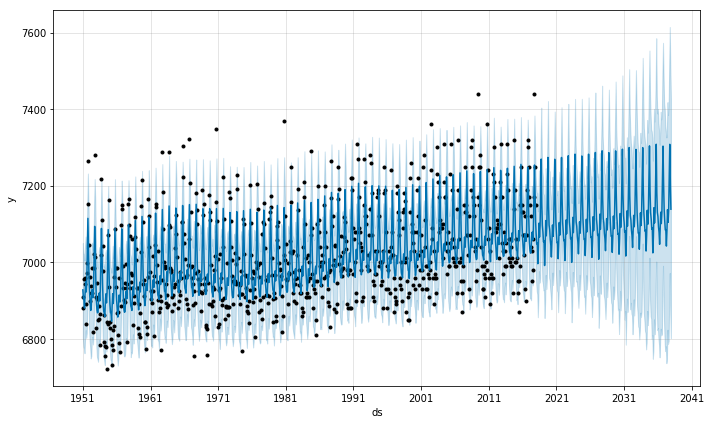

In [119]:
fcst = m.predict(future)
fig = m.plot(fcst)

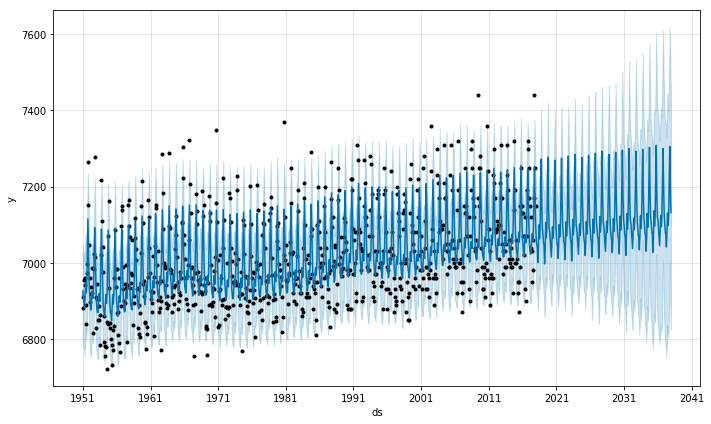

In [116]:
fcst = m.predict(future)
fig = m.plot(fcst)

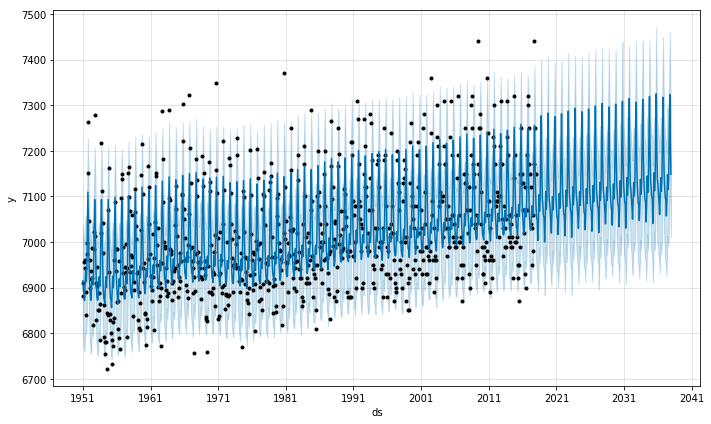

In [110]:
fcst = m.predict(future)
fig = m.plot(fcst)

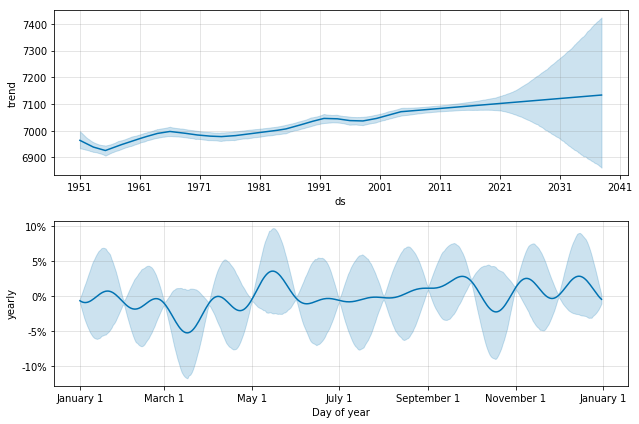

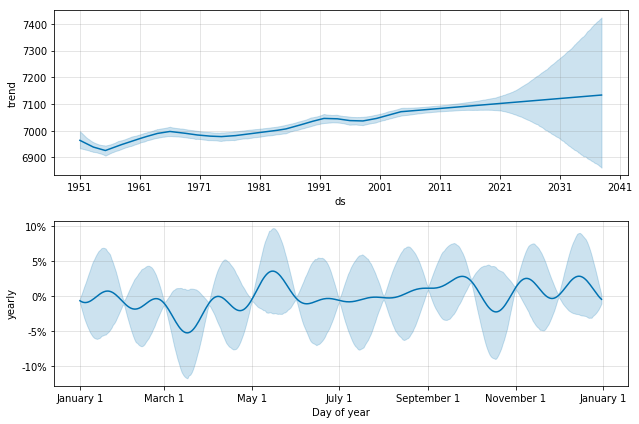

In [104]:
m.plot_components(fcst)

In [100]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1951-01-01,6952.285163,6793.817429,7035.187049,6952.285163,6952.285163,-0.005399,-0.005399,-0.005399,-0.005399,-0.005399,-0.005399,0.0,0.0,0.0,6914.747953
1,1951-02-01,6951.950910,6778.234690,7012.494342,6951.950910,6951.950910,-0.008484,-0.008484,-0.008484,-0.008484,-0.008484,-0.008484,0.0,0.0,0.0,6892.970505
2,1951-03-01,6951.649004,6775.073222,7006.716361,6951.649004,6951.649004,-0.009115,-0.009115,-0.009115,-0.009115,-0.009115,-0.009115,0.0,0.0,0.0,6888.283679
3,1951-04-01,6951.314752,6745.066530,6985.147036,6951.314752,6951.314752,-0.011479,-0.011479,-0.011479,-0.011479,-0.011479,-0.011479,0.0,0.0,0.0,6871.521439
4,1951-05-01,6950.991281,6801.268835,7032.221822,6950.991281,6950.991281,-0.006102,-0.006102,-0.006102,-0.006102,-0.006102,-0.006102,0.0,0.0,0.0,6908.575258
5,1951-06-01,6950.657028,6817.555943,7060.384741,6950.657028,6950.657028,-0.001618,-0.001618,-0.001618,-0.001618,-0.001618,-0.001618,0.0,0.0,0.0,6939.413965
6,1951-07-01,6950.333558,6800.412262,7023.038064,6950.333558,6950.333558,-0.005366,-0.005366,-0.005366,-0.005366,-0.005366,-0.005366,0.0,0.0,0.0,6913.038367
7,1951-08-01,6949.999305,6837.774955,7065.001710,6949.999305,6949.999305,-0.001652,-0.001652,-0.001652,-0.001652,-0.001652,-0.001652,0.0,0.0,0.0,6938.518646
8,1951-09-01,6949.665052,6906.728080,7155.530621,6949.665052,6949.665052,0.011618,0.011618,0.011618,0.011618,0.011618,0.011618,0.0,0.0,0.0,7030.403283
9,1951-10-01,6949.341581,6992.696147,7221.204323,6949.341581,6949.341581,0.023002,0.023002,0.023002,0.023002,0.023002,0.023002,0.0,0.0,0.0,7109.187106
